In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Descriptors import ExactMolWt
enumerator = rdMolStandardize.TautomerEnumerator()
import os 

In [2]:
#code, dont mind this part, go stright to analysis to understand what is going on

def get_canonical_molecules(network):
    """ Gets the canonical SMILES strings and Molecule objects of tautomers  in a Network """
        # BASIC NOTATION
    # name  == SMILES string list
    # name_molecule == Molecule object list

    tautomer_molecules =[] # a list that will hold the most stable tautomer
    tautomer = []
    for i in range(0,len(network)):

        mol = Chem.MolFromSmiles(network[i])         # conver to mol object
        can = Chem.MolToSmiles(mol)                  # back to smiles (this will creat canonical strings)
        can_mol=Chem.MolFromSmiles(can)              # convert back to molto see if there are in fact canonical

        taut_mol = enumerator.Canonicalize(can_mol)  # get tautomer (it only works with molecule objects)
        tautomer_molecules.append(taut_mol)          # append to tuatomer_molecules list
        taut = Chem.MolToSmiles(mol)                 # convert to smiles
        tautomer.append(taut)                        # append to tuatomer (SMILES)list

    return (tautomer,tautomer_molecules)

def plot_molecules(tautomer_molecules,c=4,maxMols=50):
    """ prints the canonical molecule objects (intened to be a visual aid) """
    #just a test to see if wee chose the correct type of input
    if str(type(tautomer_molecules[0])) == "<class 'rdkit.Chem.rdchem.Mol'>":
        pass
    else:
        return

    #LEGEND GENERATOR
    legend_list=[]
    for i in range(1,len(tautomer_molecules)+1):
        if  i== 1:
            dummie="st"
        elif i == 2:
            dummie="nd"
        elif i== 3:
                dummie="rd"
        else:
            dummie="th"
        legend_list.append(str(i)+ dummie + " Moluecule")

    # Some visual settings
    tab="\t\t\t      " #adds tabs
    print("\033[1m" + tab +"TAUTOMR MOLECULES:" + "\033[0m") # title in bold
    img = Draw.MolsToGridImage(tautomer_molecules,molsPerRow =c,legends=legend_list,maxMols=maxMols)

    return img

def plot_smiles(network,c=4,title="INPUT Molecules",maxMols=50):
    mols = []
    for i in range(0,len(network)):
        mol = Chem.MolFromSmiles(network[i])
        mols.append(mol)
    legend_list=[]
    for i in range(1,len(mols)+1): # len +1 because for loop starts from 1
        if  i== 1:
            dummie="st"
        elif i == 2:
            dummie="nd"
        elif i== 3:
            dummie="rd"
        else:
            dummie="th"
        legend_list.append(str(i)+ dummie + " Moluecule")

    # Some visual settings
    tab="\t\t\t      " #adds tabs
    print("\033[1m" + tab +title+ "\033[0m")
    img = Draw.MolsToGridImage(mols,molsPerRow =c,legends=legend_list,maxMols=maxMols)
    return (mols,img)

def isring(mol):
    isring = 0
    a =mol.GetRingInfo()
    for i in range(mol.GetNumAtoms()):
        if  a.NumAtomRings(i) == 1:
            isring = 1
        else:
            pass
    return isring

In [3]:
# MOD's output for first iteration (restriction num of carbons can't be more than 6)
network =["C(C1C(C(C(C(O)O1)O)O)O)O","O","C=C1C(C(C(C(O)O1)O)O)O","C1C(C(C(O)OC=1CO)O)O","C1(O)OC(CO)C(C(C=1)O)O","C1OC(CO)C(C(C=1O)O)O","C1C(C(CO)OC(C=1O)O)O","C1(C(C(CO)OC(C=1)O)O)O","C1(C(C(OC(C=1)CO)O)O)O","C1C(C(OC(C=1O)CO)O)O","C(O)=C(C(C(C(CO)O)O)O)O","C(C(C(C(O)O)O)O)(O)=CCO","C(O)=CC(C(C(C(O)O)O)O)O"]

In [4]:
# MOD's output for second iteration (restriction num of carbons can't be more than 6)
network =["C(C1C(C(C(C(O)O1)O)O)O)O","O","C=C1C(C(C(C(O)O1)O)O)O","C1C(C(C(O)OC=1CO)O)O","C1(O)OC(CO)C(C(C=1)O)O","C1OC(CO)C(C(C=1O)O)O","C1C(C(CO)OC(C=1O)O)O","C1(C(C(CO)OC(C=1)O)O)O","C1(C(C(OC(C=1)CO)O)O)O","C1C(C(OC(C=1O)CO)O)O","C(O)=C(C(C(C(CO)O)O)O)O","C(C(C(C(O)O)O)O)(O)=CCO","C(O)=CC(C(C(C(O)O)O)O)O","C1(O)OC(C(C(C=1)O)O)=C","C1OC(C(C(C=1O)O)O)=C","C=C1C(C=C(C(O)O1)O)O","C=C1C(C(O)=CC(O)O1)O","C=C1C=C(C(C(O)O1)O)O","C=C1C(O)=CC(C(O)O1)O","C1(O)OC(CO)=CC(C=1)O","C1OC(CO)=CC(C=1O)O","C1(CO)OC(C(O)=CC=1)O","C1(CO)OC(C=C(C=1)O)O","C1=CC(C(O)OC=1CO)O","C1=C(O)OC(CO)C(C=1)O","C1(OC(C=C(C=1)O)CO)O","C1(OC(C(O)=CC=1)CO)O","C1=COC(CO)C(C=1O)O","C1OC(C=C(C=1O)O)CO","C1OC(C(O)=CC=1O)CO","C1=CC(CO)OC(C=1O)O","C1=C(C(CO)OC(C=1)O)O","C(O)=C(C(C(C(O)=C)O)O)O","C(O)=C(C(C=C(CO)O)O)O","C(=CO)=C(C(C(CO)O)O)O","C(O)=C(C(O)=CC(CO)O)O","C(O)=C(C(C(O)=CCO)O)O","C(O)=C(C=C(C(CO)O)O)O","C(O)=CC(C(C(O)=CO)O)O","C(=C)=C(C(C(C(O)O)O)O)O","C(O)(O)=CC(C(O)=CCO)O","C(C(O)O)(O)=CC(O)=CCO","C(CO)=C(C(O)=CC(O)O)O","C(=C(C(C(O)O)O)O)=CCO","C(=CO)=CC(C(C(O)O)O)O","C(O)(O)=CC(C(C=CO)O)O","C(O)=CC(C=C(C(O)O)O)O","C(O)=CC(C(O)=CC(O)O)O","C(O)=CC=C(C(C(O)O)O)O","C(O)=CC(O)=CC(C(O)O)O","CC1(C(C(C(C(O)O1)O)O)O)O","C(C1(CC(C(C(O)O1)O)O)O)O","C(C1C(C(CC(O)(O)O1)O)O)O","C1C(C(C(C(CO)O1)O)O)(O)O","C(C1C(CC(C(O)O1)(O)O)O)O","C(C1C(C(CC(O)O1)(O)O)O)O","C(C1CC(C(C(O)O1)O)(O)O)O","C(C1C(CC(C(O)O1)O)(O)O)O","C(C(C(C(C(CO)(O)O)O)O)O)O","C(C(C(C(C(C(O)O)O)O)O)O)O","C(CC(C(C(C(O)O)O)O)(O)O)O","C(C(C(C(CC(O)O)O)O)O)(O)O","C1OC(CO)C(C(C#1)O)O","C1C(C(CO)OC(C#1)O)O","C1C(C(OC(C#1)CO)O)O","C(O)#CC(C(C(CO)O)O)O","C(C(C(C(O)O)O)O)#CCO","C#CC(C(C(C(O)O)O)O)O"]

In [5]:
# MOD's output for third iteration (restriction num of carbons can't be more than 6)
network=["C(C1C(C(C(C(O)O1)O)O)O)O","O","C=C1C(C(C(C(O)O1)O)O)O","C1C(C(C(O)OC=1CO)O)O","C1(O)OC(CO)C(C(C=1)O)O","C1OC(CO)C(C(C=1O)O)O","C1C(C(CO)OC(C=1O)O)O","C1(C(C(CO)OC(C=1)O)O)O","C1(C(C(OC(C=1)CO)O)O)O","C1C(C(OC(C=1O)CO)O)O","C(O)=C(C(C(C(CO)O)O)O)O","C(C(C(C(O)O)O)O)(O)=CCO","C(O)=CC(C(C(C(O)O)O)O)O","C1(O)OC(C(C(C=1)O)O)=C","C1OC(C(C(C=1O)O)O)=C","C=C1C(C=C(C(O)O1)O)O","C=C1C(C(O)=CC(O)O1)O","C=C1C=C(C(C(O)O1)O)O","C=C1C(O)=CC(C(O)O1)O","C1(O)OC(CO)=CC(C=1)O","C1OC(CO)=CC(C=1O)O","C1(CO)OC(C(O)=CC=1)O","C1(CO)OC(C=C(C=1)O)O","C1=CC(C(O)OC=1CO)O","C1=C(O)OC(CO)C(C=1)O","C1(OC(C=C(C=1)O)CO)O","C1(OC(C(O)=CC=1)CO)O","C1=COC(CO)C(C=1O)O","C1OC(C=C(C=1O)O)CO","C1OC(C(O)=CC=1O)CO","C1=CC(CO)OC(C=1O)O","C1=C(C(CO)OC(C=1)O)O","C(O)=C(C(C(C(O)=C)O)O)O","C(O)=C(C(C=C(CO)O)O)O","C(=CO)=C(C(C(CO)O)O)O","C(O)=C(C(O)=CC(CO)O)O","C(O)=C(C(C(O)=CCO)O)O","C(O)=C(C=C(C(CO)O)O)O","C(O)=CC(C(C(O)=CO)O)O","C(=C)=C(C(C(C(O)O)O)O)O","C(O)(O)=CC(C(O)=CCO)O","C(C(O)O)(O)=CC(O)=CCO","C(CO)=C(C(O)=CC(O)O)O","C(=C(C(C(O)O)O)O)=CCO","C(=CO)=CC(C(C(O)O)O)O","C(O)(O)=CC(C(C=CO)O)O","C(O)=CC(C=C(C(O)O)O)O","C(O)=CC(C(O)=CC(O)O)O","C(O)=CC=C(C(C(O)O)O)O","C(O)=CC(O)=CC(C(O)O)O","CC1(C(C(C(C(O)O1)O)O)O)O","C(C1(CC(C(C(O)O1)O)O)O)O","C(C1C(C(CC(O)(O)O1)O)O)O","C1C(C(C(C(CO)O1)O)O)(O)O","C(C1C(CC(C(O)O1)(O)O)O)O","C(C1C(C(CC(O)O1)(O)O)O)O","C(C1CC(C(C(O)O1)O)(O)O)O","C(C1C(CC(C(O)O1)O)(O)O)O","C(C(C(C(C(CO)(O)O)O)O)O)O","C(C(C(C(C(C(O)O)O)O)O)O)O","C(CC(C(C(C(O)O)O)O)(O)O)O","C(C(C(C(CC(O)O)O)O)O)(O)O","C1OC(CO)C(C(C#1)O)O","C1C(C(CO)OC(C#1)O)O","C1C(C(OC(C#1)CO)O)O","C(O)#CC(C(C(CO)O)O)O","C(C(C(C(O)O)O)O)#CCO","C#CC(C(C(C(O)O)O)O)O","C1=C(O)OC(C(C=1)O)=C","C=C1C=C(C=C(O)O1)O","C=C1C(O)=CC=C(O)O1","C1=COC(C(C=1O)O)=C","C=C1C=C(C(O)=CO1)O","C=C1C(O)=CC(O)=CO1","C1=C(C(O)OC(C=1)=C)O","C1=CC(O)OC(C=1O)=C","C1=C(O)OC(CO)=CC=1","C1=C(CO)OC(O)=CC=1","C1=COC(CO)=CC=1O","C1=C(CO)OC=C(C=1)O","C1=C=CC(O)OC=1CO","C1=C=CC(CO)OC=1O","C1=C=C(C(CO)OC=1)O","C(=CO)=C(C(C(O)=C)O)O","C=C(C=C(C(O)=CO)O)O","C(=C)=C(C(C(O)=CO)O)O","C=C(C(O)=CC(O)=CO)O","C(=CO)=C(C=C(CO)O)O","C(=C(CO)O)=CC(O)=CO","C(=CO)=CC(C(O)=CO)O","C(=CO)=C(C(O)=CCO)O","C(=C=C(C(CO)O)O)=CO","C(=CO)=C(C(C=CO)O)O","C(=CCO)=C(C(O)=CO)O","C(O)=C(C(O)=CC=CO)O","C(O)=C(C=C(C=CO)O)O","C(=C)=C(C(C=C(O)O)O)O","C(=C)=C(C=C(C(O)O)O)O","C(=C)=C(C(O)=CC(O)O)O","C(=C=C(C(C(O)O)O)O)=C","C(=C(O)O)=CC(O)=CCO","C(=CCO)=C(C=C(O)O)O","C(=C=CCO)=C(C(O)O)O","C(=CO)=CC(C=C(O)O)O","C(=CO)=CC=C(C(O)O)O","C(=CO)=CC(O)=CC(O)O","C(=C=CC(C(O)O)O)=CO","C(=C(O)O)=CC(C=CO)O","C(O)=CC=C(C=C(O)O)O","C(O)=CC(O)=CC=C(O)O","C(=C(C(O)O)O)=CC=CO","C(=CC(O)O)=C(C=CO)O","C1(O)OC(C)(C(C(C=1)O)O)O","C1OC(C)(C(C(C=1O)O)O)O","C1C(C(C)(OC(C=1O)O)O)O","C1(C(C(C)(OC(C=1)O)O)O)O","C1(C(C(OC(C=1)(C)O)O)O)O","C1(C(C(C(O)OC=1C)O)O)O","C1C(C(OC(C=1O)(C)O)O)O","C1C(C(OC(C=1)(CO)O)O)O","C1(O)OC(CO)(CC(C=1)O)O","C1OC(CO)(CC(C=1O)O)O","C1CC(CO)(OC(C=1O)O)O","C1(CC(CO)(OC(C=1)O)O)O","C(O)=C1CC(C(C(O)O1)O)O","C1C(C(CO)OC(C=1)(O)O)O","C=C1C(C(CC(O)(O)O1)O)O","C1C(CC(O)(O)OC=1CO)O","C1(CC(OC(C=1)CO)(O)O)O","C1CC(OC(C=1O)CO)(O)O","C=C1C(C(C(CO1)(O)O)O)O","C1C(C(COC=1CO)(O)O)O","C1(C(C(CO)OCC=1O)O)O","C1C(CO)OCC(C=1O)(O)O","C1(C(CO)OCC(C=1)(O)O)O","C1C(CO)OC(C(C=1)(O)O)O","C=C1C(CC(C(O)O1)(O)O)O","C1CC(C(O)OC=1CO)(O)O","C1(O)OC(CO)C(CC=1O)O","C1OC(CO)C(C(C=1)(O)O)O","C=C1C(C(CC(O)O1)(O)O)O","C1C(CC(O)OC=1CO)(O)O","C1(CC(OC(C=1O)CO)O)O","C=C1CC(C(C(O)O1)O)(O)O","C1(O)OC(CO)CC(C=1)(O)O","C1OC(CO)CC(C=1O)(O)O","C1(CC(CO)OC(C=1O)O)O","C1C(C(CO)OC(C=1)O)(O)O","C=C1C(CC(C(O)O1)O)(O)O","C1(CC(C(O)OC=1CO)O)O","C1(O)OC(CO)C(CC=1)(O)O","C1OC(CO)C(CC=1O)(O)O","C=C(C(C(C(CO)(O)O)O)O)O","C(C(C(CO)(O)O)O)=C(CO)O","C(C(C(CO)O)O)(O)=C(CO)O","C(C(CO)O)=C(C(CO)(O)O)O","C(C(C(CO)(O)O)O)(O)=CCO","C(C(CO)O)(O)=CC(CO)(O)O","C(O)=CC(C(C(CO)(O)O)O)O","C(C(C(CO)O)O)=C(C(O)O)O","C=C(C(C(C(C(O)O)O)O)O)O","C(C(C(C(O)O)O)O)=C(CO)O","C(O)(O)=CC(C(C(CO)O)O)O","C(C(C(CO)O)O)(O)=CC(O)O","C(C(C(O)O)O)(O)=CC(CO)O","C(C(CO)O)(O)=CC(C(O)O)O","C=CC(C(C(C(O)O)O)O)(O)O","C(O)(O)=CC(C(CCO)(O)O)O","C(O)=C(C(C(CCO)(O)O)O)O","C(C(CCO)(O)O)=C(C(O)O)O","C(C(CCO)(O)O)(O)=CC(O)O","C(CCO)(O)=C(C(C(O)O)O)O","C(C(C(C(O)O)O)O)=CC(O)O","C(O)(O)=CC(C(CC(O)O)O)O","C(O)=C(C(C(CC(O)O)O)O)O","C(C(CC(O)O)O)=C(C(O)O)O","C(C(CC(O)O)O)(O)=CC(O)O","C(CC(O)O)=C(C(C(O)O)O)O","C(CC(O)O)(O)=CC(C(O)O)O","C1OC(C(C(C#1)O)O)=C","C1OC(CO)=CC(C#1)O","C1OC(C=C(C#1)O)CO","C1OC(C(O)=CC#1)CO","C1C(C(OC(C#1)O)=C)O","C1C(O)OC(CO)=CC#1","C1C(C(OC(C#1)=C)O)O","C1C(CO)OC(O)=CC#1","C1C(CO)OC=C(C#1)O","C(O)#CC(C(C(O)=C)O)O","C(O)#CC(C=C(CO)O)O","C(O)#CC(O)=CC(CO)O","C(O)#CC(C(O)=CCO)O","C(O)#CC=C(C(CO)O)O","C(O)#CC(C(C=CO)O)O","C(C(C=C(O)O)O)#CCO","C(C(C(O)=CO)O)#CCO","C(CO)#CC=C(C(O)O)O","C(CO)#CC(O)=CC(O)O","C#CC(C(C=C(O)O)O)O","C#CC(C(C(O)=CO)O)O","C#CC(C=C(C(O)O)O)O","C#CC(C(O)=CC(O)O)O","C#CC=C(C(C(O)O)O)O","C#CC(O)=CC(C(O)O)O","C(O)=C(C(C(C(C)(O)O)O)O)O","C(C(C(C(O)O)O)O)(O)=C(C)O","C(O)=C(C(CC(CO)(O)O)O)O","C(O)=C(CC(C(C(O)O)O)O)O","C(C(CC(O)(O)O)O)(O)=CCO","C(O)=CC(C(CC(O)(O)O)O)O","C(CC(C(O)O)(O)O)(O)=CCO","C(O)=CC(CC(C(O)O)(O)O)O","C(O)=CC(C(C(CO)O)O)(O)O","C(C(CC(O)O)(O)O)(O)=CCO","C(O)=CC(C(CC(O)O)(O)O)O","C(C(C(C(O)O)O)(O)O)=CCO","C(O)=C(C(CC(CO)O)(O)O)O","C(O)=CCC(C(C(O)O)O)(O)O","C(O)=C(CC(C(CO)O)(O)O)O","C(O)=CC(CC(C(O)O)O)(O)O","C(C(O)O)#CC(O)=CCO","C(C(C=CO)O)#CC(O)O","C(C(CO)O)#CC(O)=CO","C(C(C(O)O)O)#CC=CO","C1OC2COC=1C(C2O)O","C12OCC(C(C(C=1)O)O)O2","C1OC(CO)C(C2C=1O2)O","C12OC(C=1)C(C(CO)O2)O","C1OC(CO)C2C(C=1O2)O","C12OC(C(CO)O1)C(C=2)O","C12C(C(CO1)OC(C=2)O)O","C1C(C2COC=1C(O)O2)O","C12C(C(CO)OC(C=1)O2)O","C1C(C(CO)OC2C=1O2)O","C12C(C(CO)OC(C=1)O)O2","C1C2C(CO)OC(C=1O2)O","C1C(C(OC2C=1OC2)O)O","C12C(C(OC(C=1)CO2)O)O","C1C(C2OC(C=1O2)CO)O","C12C(C(OC(C=1)CO)O2)O","C12C(CO)OC(C(C=1)O2)O","C1C(CO)OC(C2C=1O2)O","C(O)=C1C(C(C(CO1)O)O)O","C1(O)OCC(C(C(C=1)O)O)O","C(O)=C1C(C(C(CO)O1)O)O","C(O)=C1C(C(C(CO)O)O)O1","C1(OC(C=1)C(C(CO)O)O)O","C(O)=C1C(C(C(CO)O)O1)O","C1(O)OC(C(CO)O)C(C=1)O","C1(C(C(C(O)O)O)O)OCC=1","C(C(C(C(O)O)O)O)=C1CO1","C1(C(C(C(O)O1)O)O)=CCO","C1(C(C(C(O)O)O1)O)=CCO","C1C(C(C(O)O)OC=1CO)O","C1(C(C(C(O)O)O)O1)=CCO","C1C(C(C(O)O)O)OC=1CO","C1OC(C(C(C(C=1)O)O)O)O","C=C1C(C(C(C(O)O)O1)O)O","C1OC(C(O)O)C(C(C=1)O)O","C=C1C(C(C(C(O)O)O)O1)O","C1OC(C(C(O)O)O)C(C=1)O","C=C1C(C(C(C(O)O)O)O)O1","C1OC(C=1)C(C(C(O)O)O)O"]

In [6]:
nodes = len(network)
print("nodes on network:",nodes)

nodes on network: 263


			      Mod output molecules


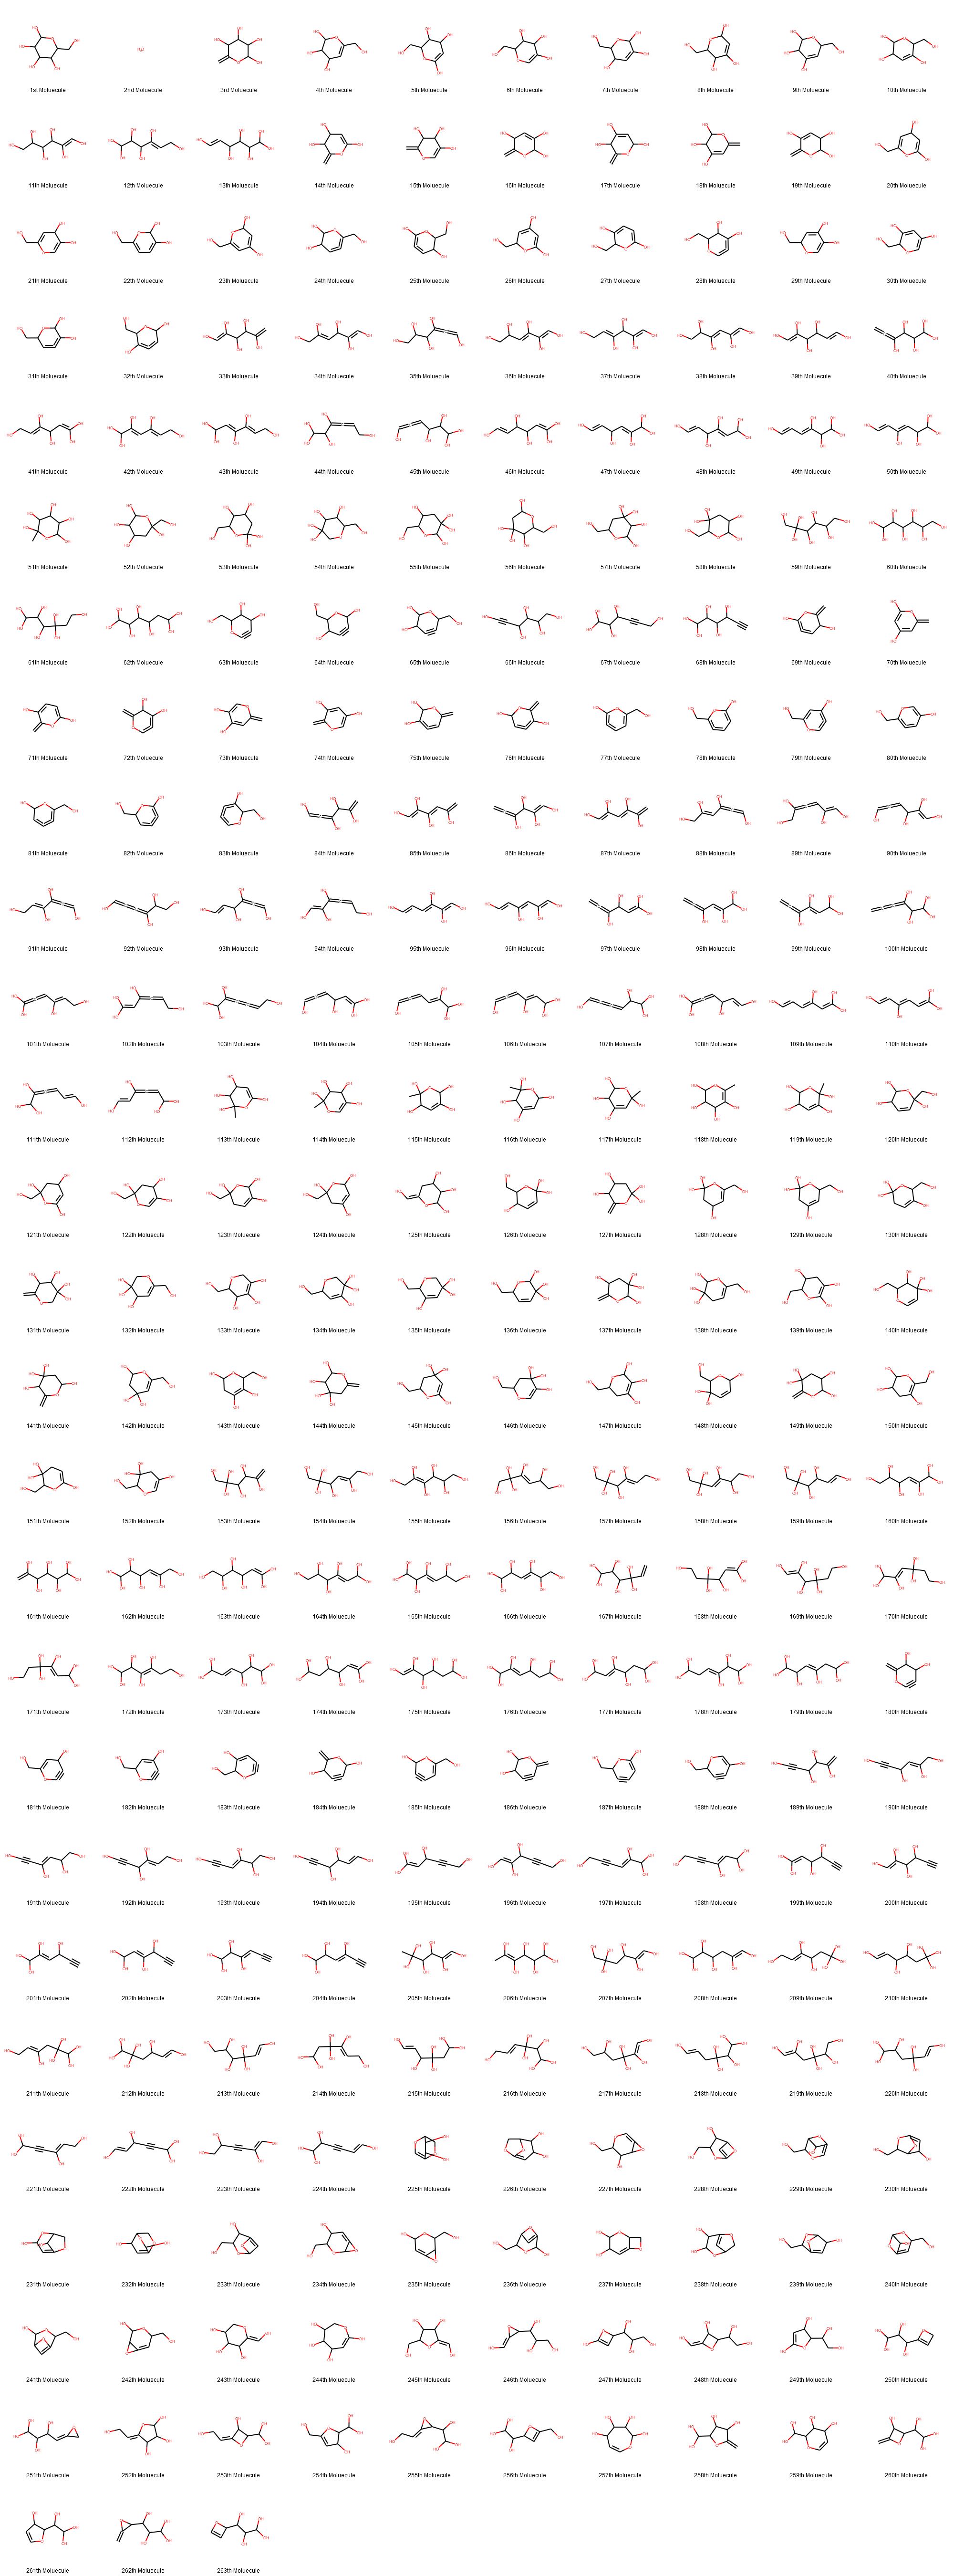

In [8]:
mols,img = plot_smiles(network,c=10,maxMols=nodes,title="Mod output molecules")  # lets print the fresh output of mod (input of our analysis)
img

In [9]:
# 21 and 29 have different depection but they are the same  :C therefor different smiles for same molecules :CCCCCC

In [10]:
(tautomer,tautomer_molecules) = get_canonical_molecules(network)  # lets get the output of mod and transform to canonical
#print(tautomer)

			      TAUTOMR MOLECULES:


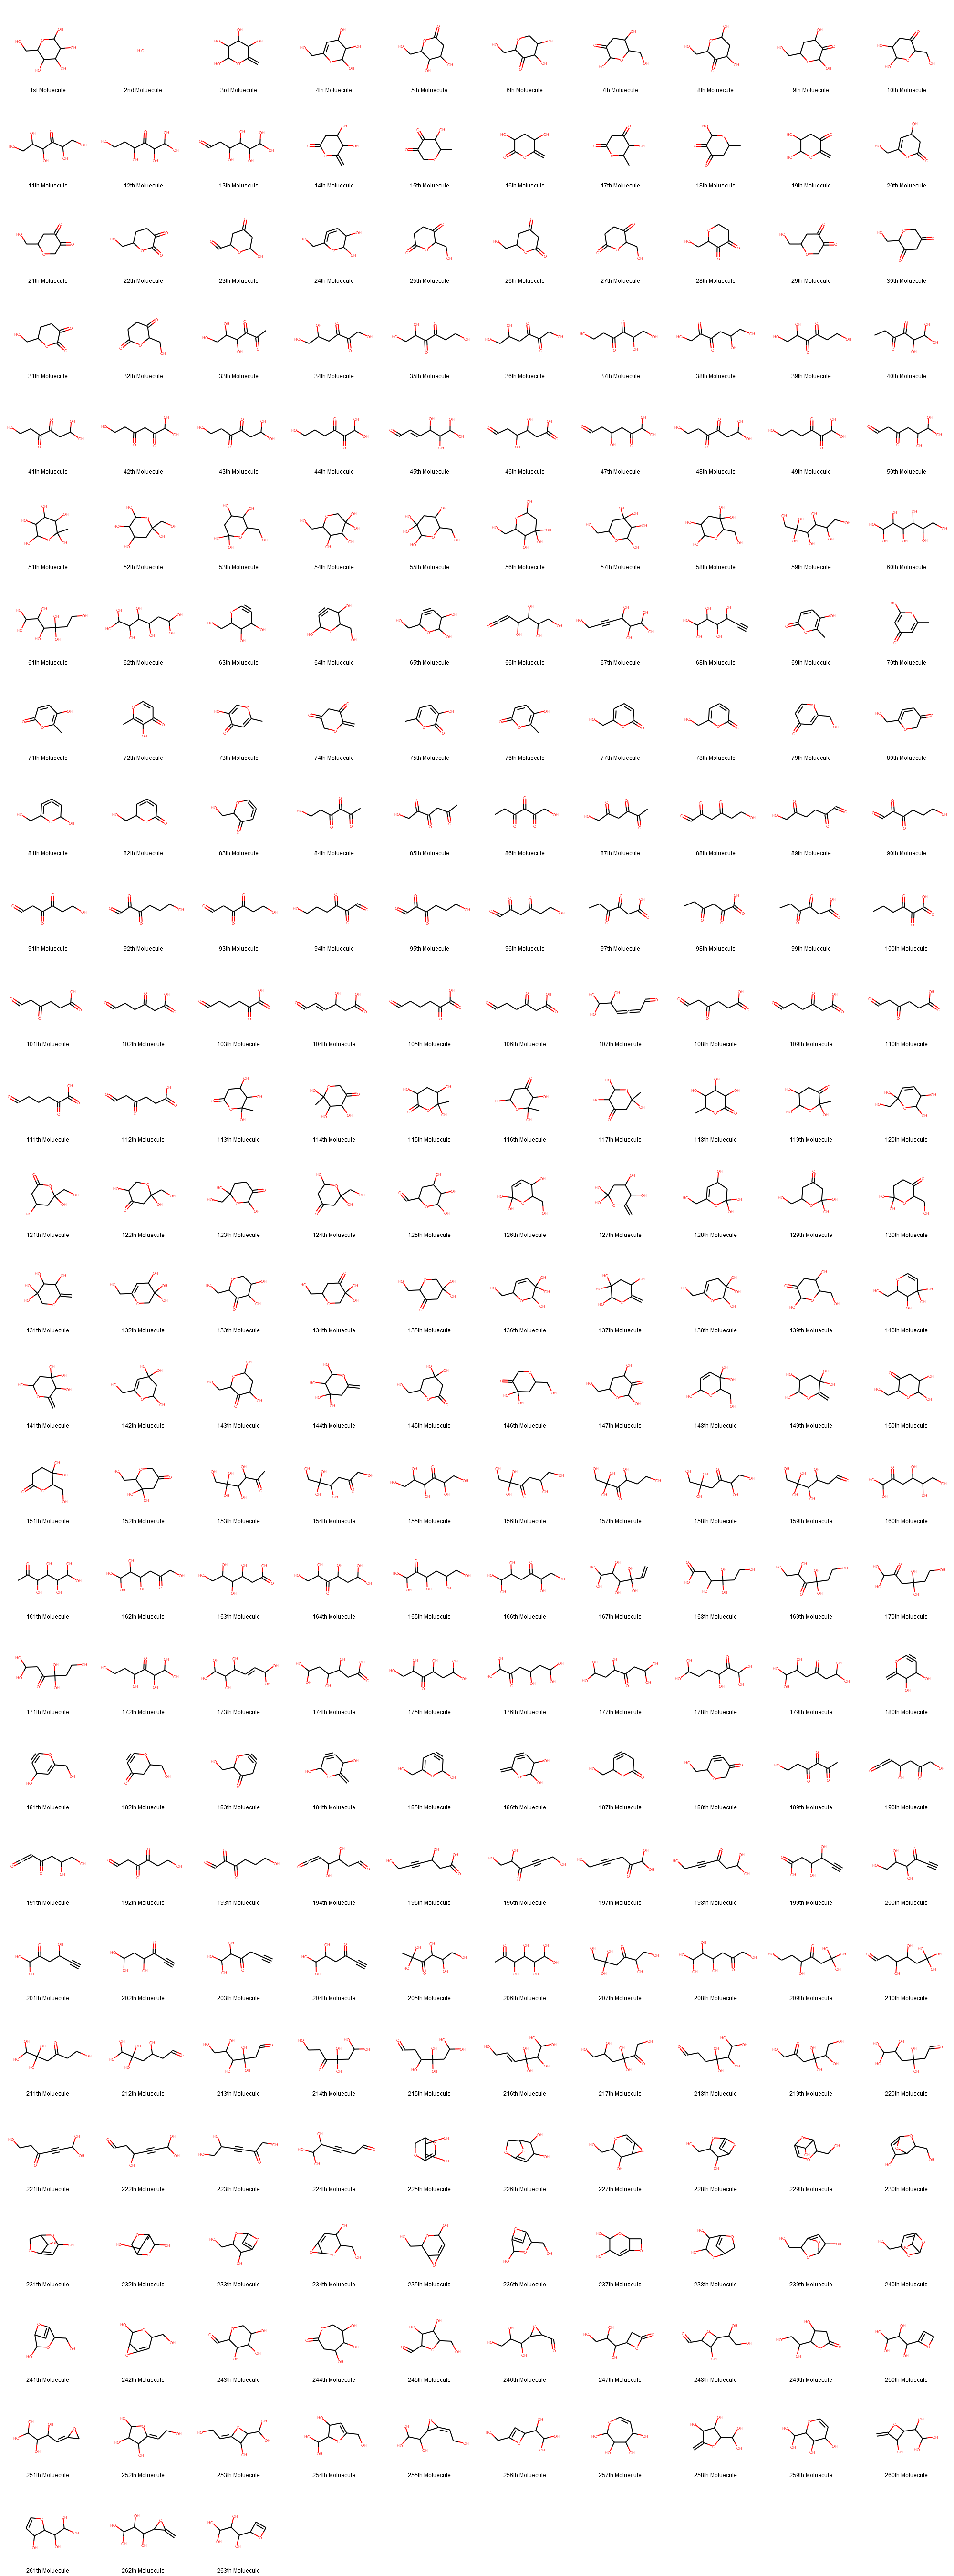

In [11]:
plot_molecules(tautomer_molecules,c=10,maxMols=nodes) #lets plot what we got 

In [12]:
# 21 and 29 have now the same depiction!  :D

In [13]:
# Now we want to get the same string, even if the molecule is rotaded, for this we are going to use a trick 
# I found on the paper shared by SID :)
new_tautomer = []
mol_tautomer = []
for i in range(0,len(tautomer)):
    sm = Chem.MolToSmiles(tautomer_molecules[i]) #from the mol canoncial objects get the srtings that defined them
    mol_1 = Chem.MolFromSmiles(sm)               # convert back to mol object (this is done in order to get the canonical)
    # 2nd convert back to smiles
    can_1 = Chem.MolToSmiles(mol_1)              # convert them back to string out of mol (to take care of rotated molecules)
    new_tautomer.append(can_1)                   # append this to new_tatuomer

In [14]:
print("toutmer origingal len:",len(tautomer),"tautomer new len:",len(new_tautomer)) # we see same number of molecules :)
print("different molecules in network:",len(set(new_tautomer))) #but only 222 are different molecules  41 are repeated
print("reperetad moleucles:",len(tautomer)-len(set(new_tautomer)))

toutmer origingal len: 263 tautomer new len: 263
different molecules in network: 222
reperetad moleucles: 41


In [15]:
unique_tautomers = list(set(set(new_tautomer))) #lets definde the set as a variable 

			      Unique molecules


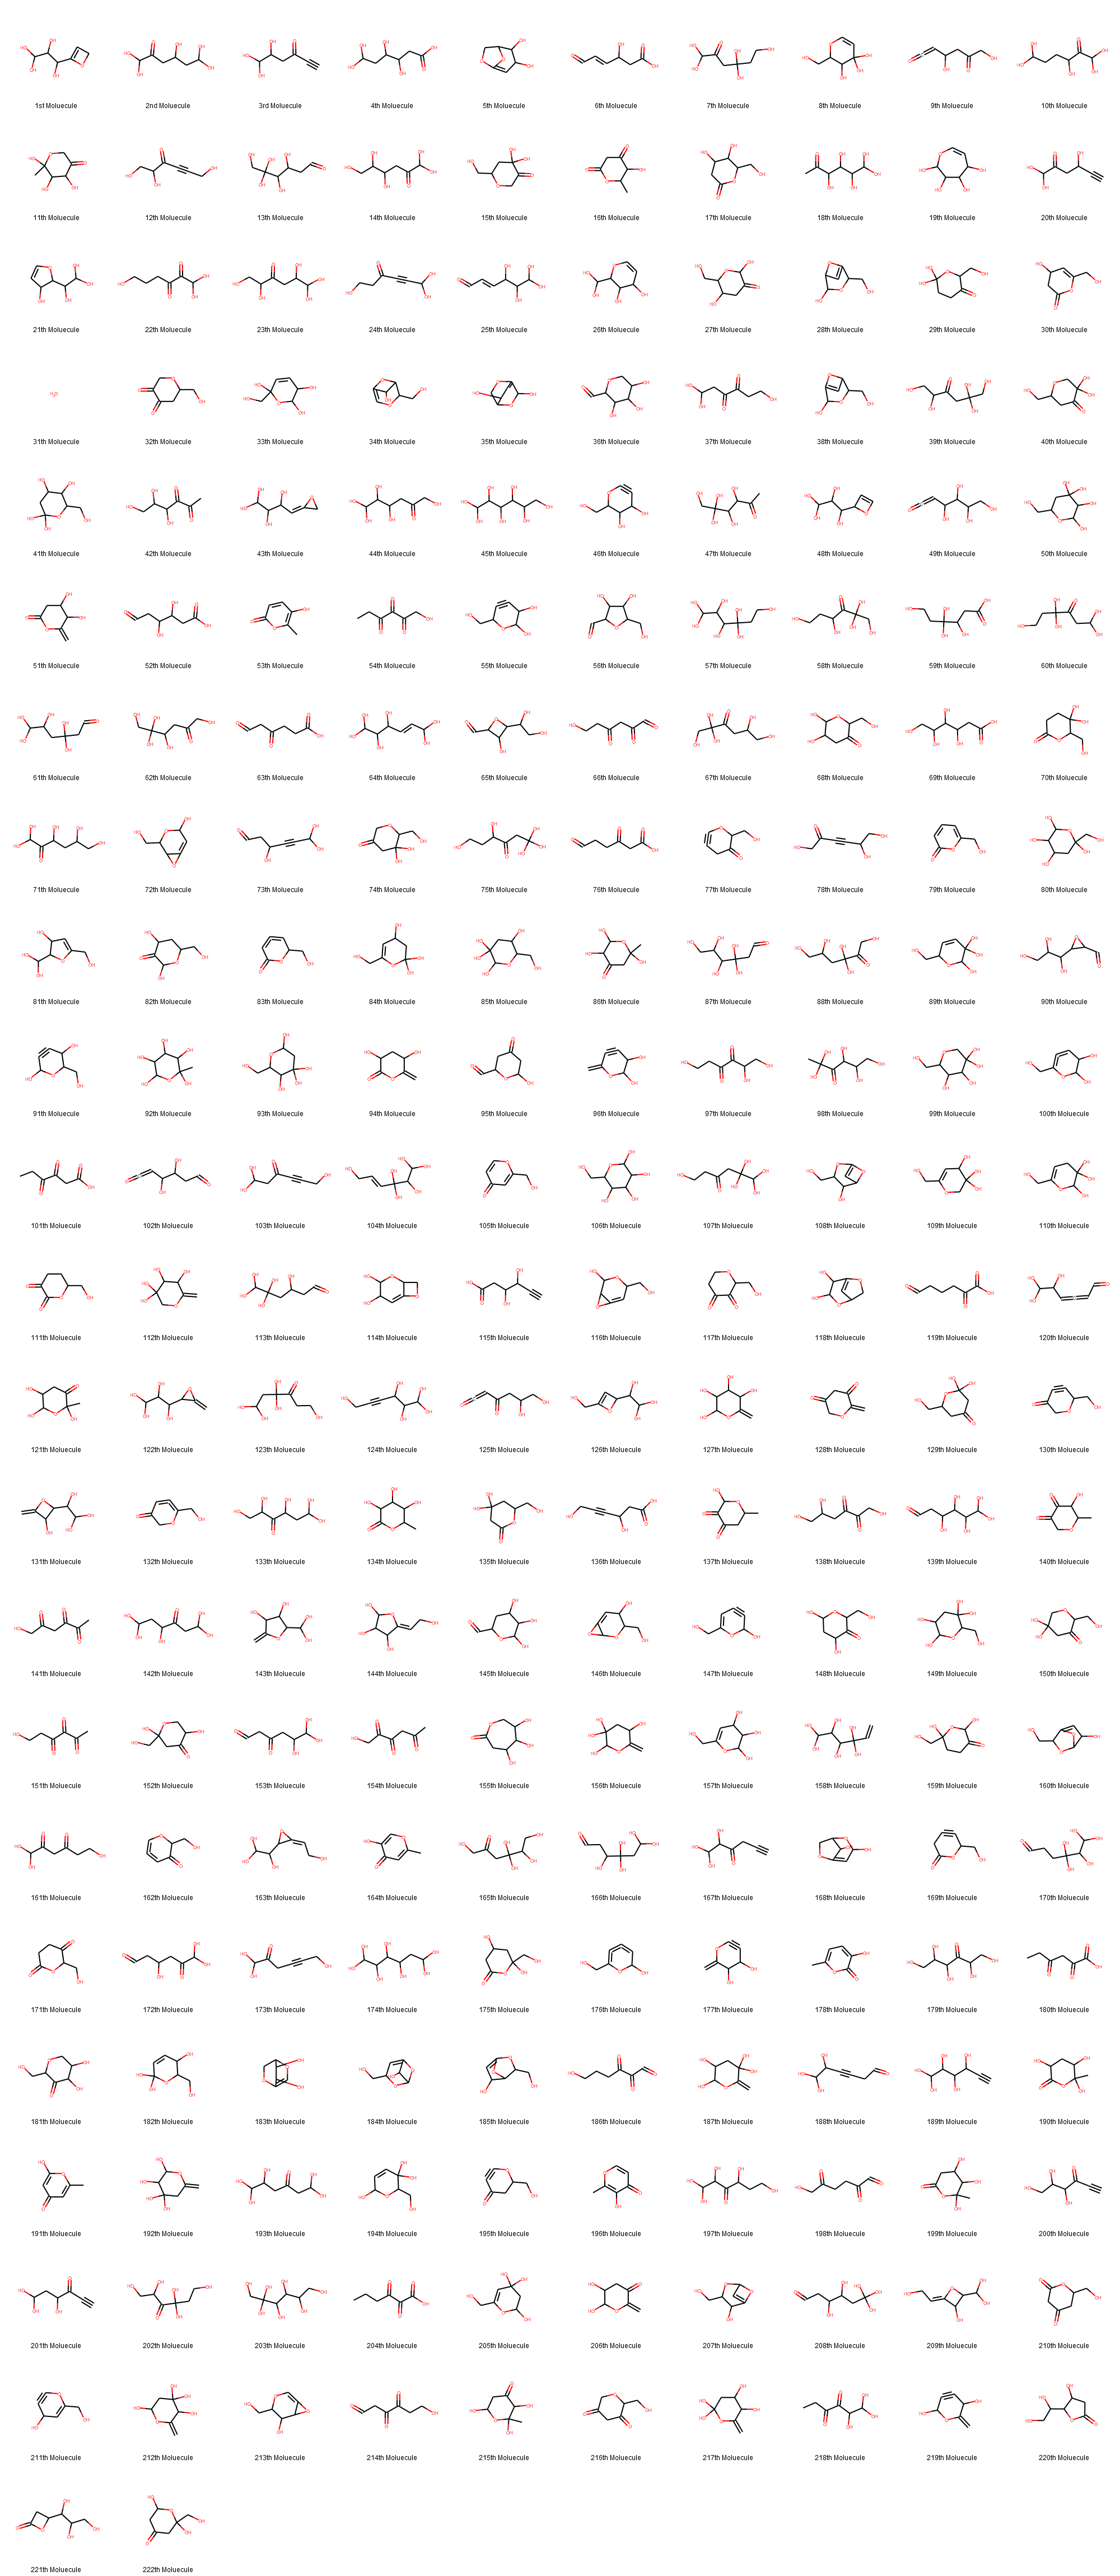

In [16]:
mols,img = plot_smiles(unique_tautomers,c=10, title="Unique molecules",maxMols=len(set(new_tautomer)))
img

In [17]:
# keep in mind that now we are plotting the smiles :) so we were able to obtain unqiue smiles, ready to be used with mod :)

In [18]:
# Summary:
# 1st iteration: no repeated molecules
# 2nd iteration: 11 repeated molecules
# 3rd iteration: 41 repeated moleucles
# keep in mind I am running my glucose degradation model with a constraint. for instnatce I got 263 molecules on the third
# iteration (instead of the usual 3000), this means that we should be able to find more tautomers if we don't have 
# any restriction 
